In [1]:
import dca_frustratometer
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess

In [2]:
pdb_name="6U5E_A"

filtered_aligned_sequence=subprocess.check_output(["sed","-n",""'/>%s$/,/>/p'"" % pdb_name,
                                                  f"./data/PF00160_all_pseudogene_parent_sequences_aligned_PFAM_27_gaps_and_inserts_filtered_gap_threshold_0.2.fasta"])
filtered_aligned_sequence="".join(filtered_aligned_sequence.decode().split("\n")[1:-2])
###
aligned_sequence=subprocess.check_output(["sed","-n",""'/>%s$/,/>/p'"" % pdb_name,
                                          f"./data/PF00160_all_pseudogene_parent_sequences_aligned_PFAM_27.fasta"])    
aligned_sequence="".join(aligned_sequence.decode().split("\n")[1:-2])

In [3]:
structure=dca_frustratometer.Structure.full_pdb('./data/6U5E_A.pdb',"A",
                                                filtered_aligned_sequence=filtered_aligned_sequence,
                                                aligned_sequence=aligned_sequence)
###
potts_model_file="./data/PF00160_PFAM_27_dca_gap_threshold_0.2.mat"
DCA_model=dca_frustratometer.PottsModel.from_potts_model_file(structure,potts_model_file,distance_cutoff=15,
                                                              sequence_cutoff=1,reformat_potts_model=True)

@> 2471 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2475
  PDBConstructionWarning,
@> 2471 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [4]:
DCA_model.native_energy()

-979.1245831121535

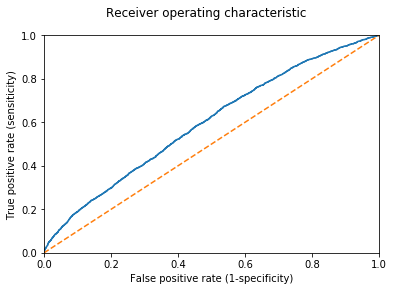

In [5]:
DCA_model.plot_roc()

In [6]:
print(DCA_model.auc())

0.5957271553471943


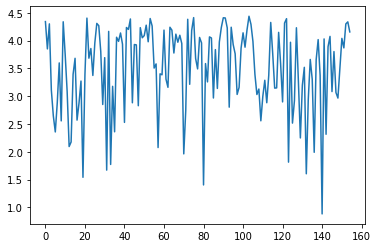

In [7]:
plt.plot(DCA_model.frustration(kind='singleresidue'))

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


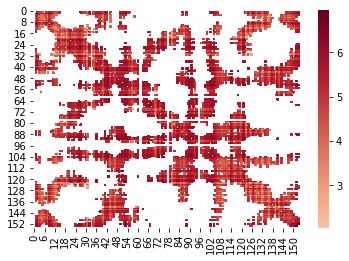

In [8]:
sns.heatmap(DCA_model.frustration(kind='mutational'),cmap='RdBu_r',center=0)

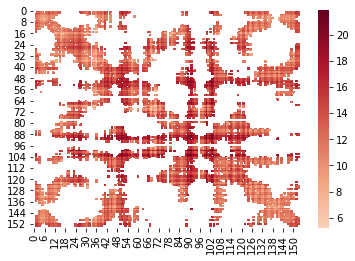

In [9]:
sns.heatmap(DCA_model.frustration(kind='configurational'),cmap='RdBu_r',center=0)

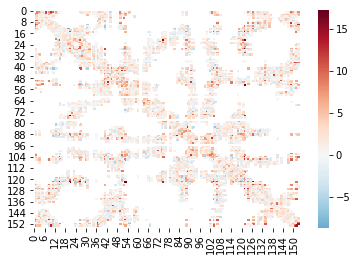

In [10]:
sns.heatmap(DCA_model.frustration(kind='contact'),cmap='RdBu_r',center=0)

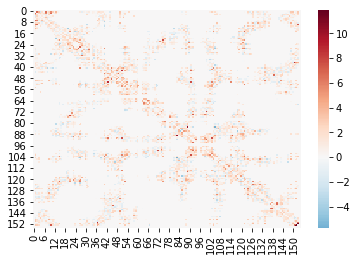

In [11]:
sns.heatmap(DCA_model.frustration(kind='contact',correction=0.1),cmap='RdBu_r',center=0)

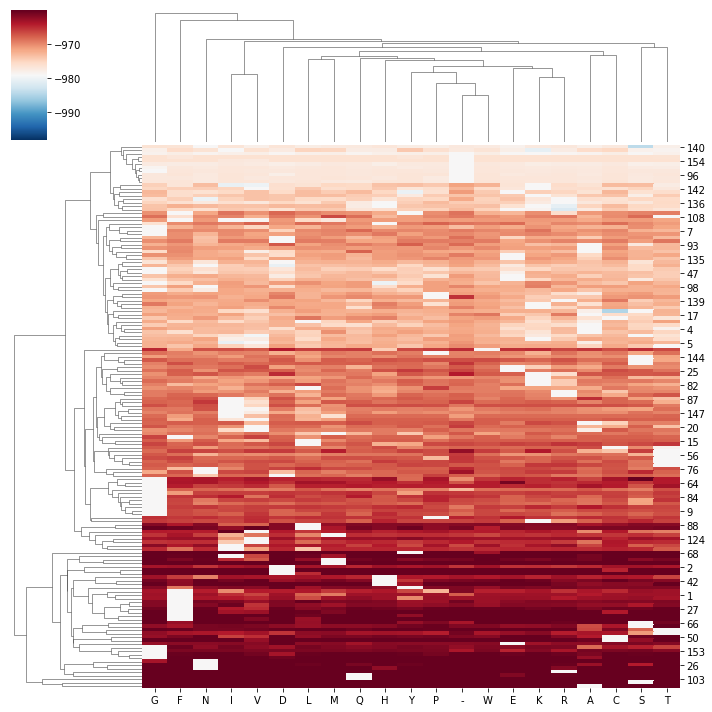

In [12]:
DCA_model.plot_decoy_energy(kind='singleresidue')

In [13]:
#sns.clustermap(model.decoy_energy('mutational').reshape(-1,21*21))

In [14]:
DCA_model.decoy_fluctuation(kind='singleresidue').mean()

10.630196636239042

In [15]:
DCA_model.decoy_fluctuation(kind='mutational').mean()

6.739939485258169

In [16]:
DCA_model.decoy_fluctuation(kind='contact').mean()

0.060441200264177354

In [17]:
DCA_model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:149: RuntimeWarning: invalid value encountered in greater
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] > 1]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:150: RuntimeWarning: invalid value encountered in less
  frustrated = sel_frustration[sel_frustration[:, -1] < -.78]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol